# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | October 2024
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [111]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\hiren\Desktop\spotify_song_attributes-data.csv")

# 2.&nbsp;Data Cleaning (overview)

In [112]:
print(data)

# shape
data.shape

# # describe
data.describe()

# info
data.info()

# categorical info
print(data.value_counts())


      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

# 3.&nbsp;Data Cleaning (interpretability)

In [113]:
df = data.copy()

# data types
print(df.dtypes)

# rename unknown
df = df.rename(columns={'Unnamed: 0': 'id'})

# change duration from ms to mins
df["duration_ms"] = df["duration_ms"].apply(lambda ms: round(ms / 1000 / 60, 3))

# rename durationms to durationmin
df = df.rename(columns={'duration_ms': 'duration_min'})

# # check null values
# print(df.isnull().sum())

# # check for duplicates
# print(df.duplicated().sum())

# make sure titles are strings
df['song_title'] = df['song_title'].apply(lambda x: str(x))

# Convert 'mode', 'key' to categorical
df['mode'] = df['mode'].astype('category')
df['key'] = df['key'].astype('category')

print(df)


Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object
        id  acousticness  danceability  duration_min  energy  \
0        0       0.01020         0.833         3.410   0.434   
1        1       0.19900         0.743         5.449   0.359   
2        2       0.03440         0.838         3.095   0.412   
3        3       0.60400         0.494         3.324   0.338   
4        4       0.18000         0.678         6.548   0.561   
...    ...           ...           ...           ...     ...   
2012  2012       0.00106         0.584         4.573   0.932  

# 4.&nbsp;Data Cleaning (reduction)

In [114]:
# qn 1: 
# does energy influence popularity of a song
# is there a relationship between a song's energy level and its popularity (target)?

# remove unimportant cols
# df_energy = df.drop(columns=[])


In [115]:

# qn 2: Does acousticness influence danceability?
#  what's the relationship btn a song's acousticness and its danceability

# drop unimportant cols
df_acoustic = df.drop(columns=['id', "speechiness", "key", "time_signature"])


print(df_acoustic)

      acousticness  danceability  duration_min  energy  instrumentalness  \
0          0.01020         0.833         3.410   0.434          0.021900   
1          0.19900         0.743         5.449   0.359          0.006110   
2          0.03440         0.838         3.095   0.412          0.000234   
3          0.60400         0.494         3.324   0.338          0.510000   
4          0.18000         0.678         6.548   0.561          0.512000   
...            ...           ...           ...     ...               ...   
2012       0.00106         0.584         4.573   0.932          0.002690   
2013       0.08770         0.894         3.036   0.892          0.001670   
2014       0.00857         0.637         3.453   0.935          0.003990   
2015       0.00164         0.557         3.093   0.992          0.677000   
2016       0.00281         0.446         3.409   0.915          0.000039   

      liveness  loudness mode    tempo  valence  target  \
0       0.1650    -8.795    

# 5.&nbsp;Data Cleaning (noisy data)

In [119]:
# Remove outliers using Z-scores 
# df_acoustic = df_acoustic[(np.abs(stats.zscore(df_acoustic['energy'])) < 3)]


# remove outliers
# thresholds
acousticness_threshold = df_acoustic['acousticness'].quantile(0.95)
danceability_threshold = df_acoustic['danceability'].quantile(0.95)

# filter data
df_acoustic = df_acoustic[(df_acoustic['acousticness'] <= acousticness_threshold) & 
                        (df_acoustic['danceability'] <= danceability_threshold)]



# 6.&nbsp;Data Cleaning (completeness)

In [102]:
# fill in null acoustic values if any
df_acoustic['acousticness'] = df_acoustic['acousticness'].fillna(df['acousticness'].mean())

print(df_acoustic[['acousticness', 'danceability']].describe())

       acousticness  danceability
count   1624.000000   1624.000000
mean       0.114314      0.604408
std        0.146815      0.139735
min        0.000003      0.122000
25%        0.007040      0.521750
50%        0.046100      0.622000
75%        0.172000      0.714000
max        0.612000      0.824000


# 7.&nbsp;Data Exploring


In [75]:
# Correlation between acousticness and danceability
corr_matrix = df_acoustic[['acousticness', 'danceability']].corr()
print(corr_matrix)

              acousticness  danceability
acousticness      1.000000     -0.150965
danceability     -0.150965      1.000000


# 8.&nbsp;Data Analysis

In [78]:
from scipy.stats import pearsonr

# hypothesis testing
# Pearson correlation test
corr, p_value = pearsonr(df_acoustic['acousticness'], df_acoustic['danceability'])

print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: -0.15096459888870786
P-value: 1.125668523510244e-11


# 9.&nbsp;Data Visualization

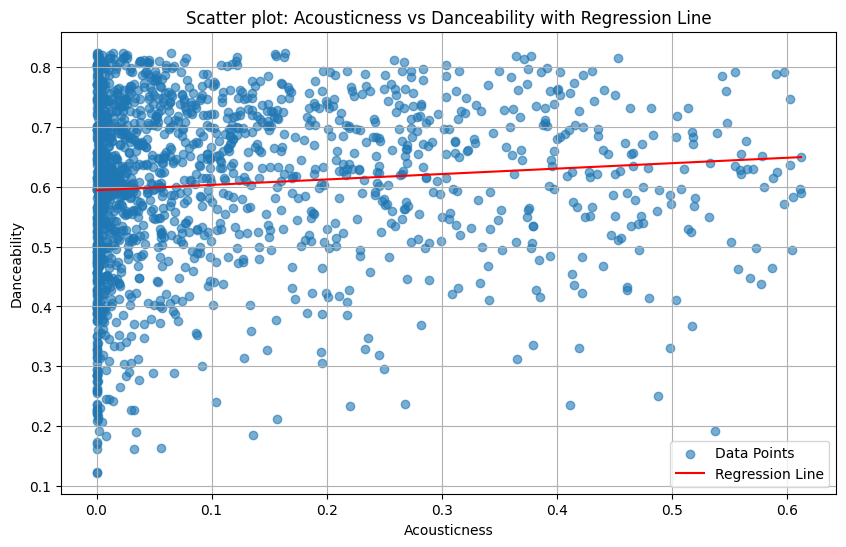

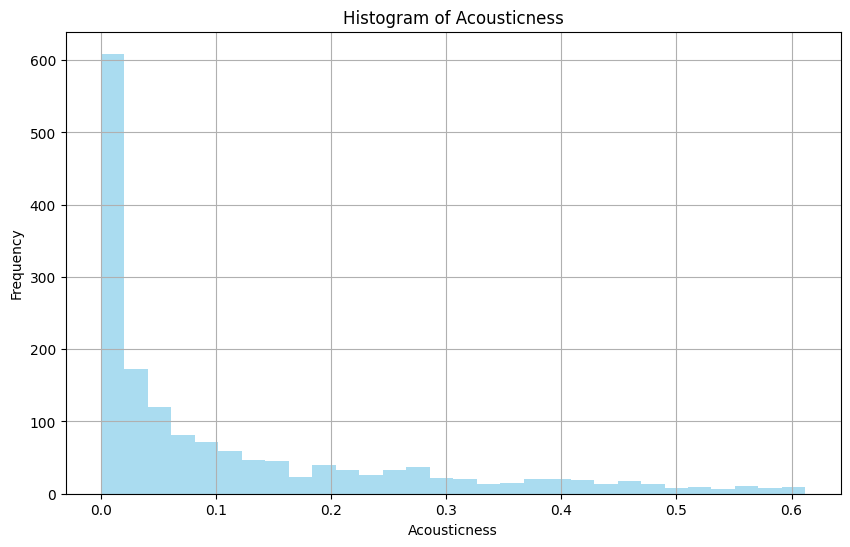

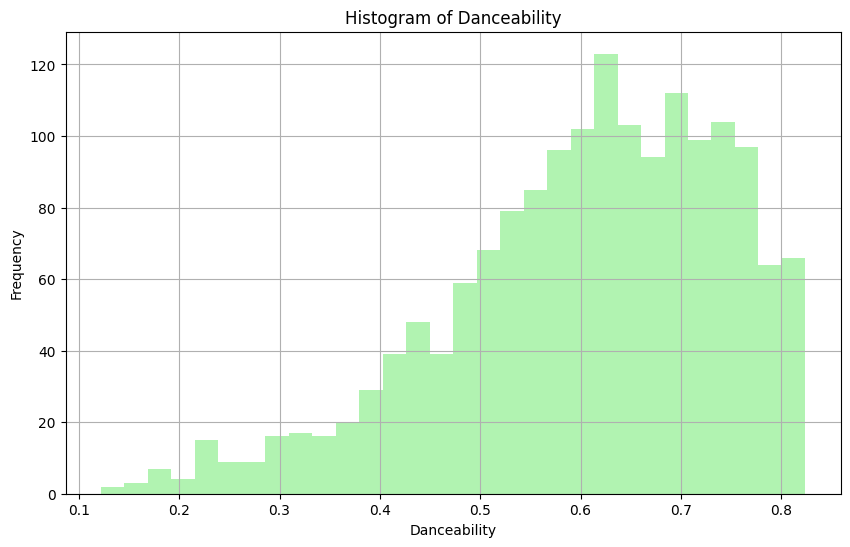

In [103]:
# Scatter plot to visualize the relationship between acousticness and danceability

# Fit a linear regression line
slope, intercept = np.polyfit(df_acoustic['acousticness'], df_acoustic['danceability'], 1)

# Create the regression line
x_values = np.linspace(df_acoustic['acousticness'].min(), df_acoustic['acousticness'].max(), 100)
y_values = slope * x_values + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_acoustic['acousticness'], df_acoustic['danceability'], alpha=0.6, label='Data Points')
plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.title('Scatter plot: Acousticness vs Danceability with Regression Line')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.legend()
plt.grid()
plt.show()



# Histogram for Acousticness
plt.figure(figsize=(10, 6))
plt.hist(df_acoustic['acousticness'], bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# Histogram for Danceability
plt.figure(figsize=(10, 6))
plt.hist(df_acoustic['danceability'], bins=30, color='lightgreen', alpha=0.7)
plt.title('Histogram of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.grid()
plt.show()



# 10.&nbsp;Data Exporting

In [121]:
# export in google collab
df_acoustic.to_csv('analysed_spotify_song_attributes.csv', index=False)